# Exercise 5

### 1. Estimate the integral $\int ^1 _0 e^x dx$  by simulation (the crude Monte estimator). Use eg. an estimator based on 100 samples and present the result as the point estimator and a confidence interval.

In order to estimate the following integral:
$$
\int_{0}^{1} e^x dx
$$
we use the crude Monte-Carlo estimator by simulation.

First, we let $U_1,\dots,U_n\sim\text{Uniform}(0,1)$. Then, we can write:
$$
\int_{0}^{1} e^x dx = \text{E}[e^U]
$$

This we can use to simulate $n=100$ samples of $U$ and thus, compute the point estimator $\hat{\theta}$:
$$
\hat{\theta} = \frac{1}{n}\sum_{i=1}^n e^{U_i}
$$


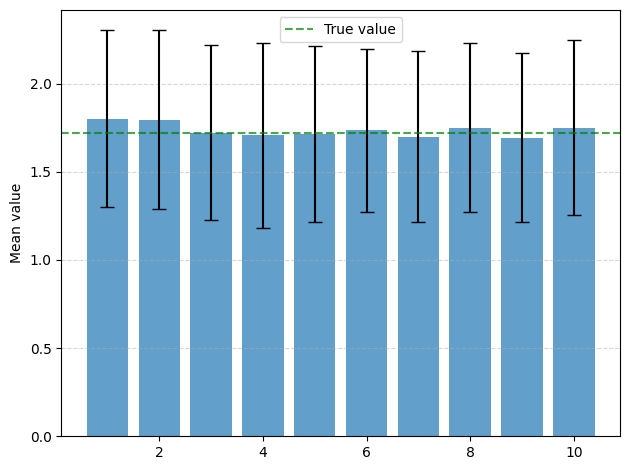

Point estimator for the integral: 1.7364
95% confidence interval: (1.7129, 1.7599)


In [9]:
import numpy as np
import scipy.stats as stats
from scipy.stats import uniform, norm, expon
import matplotlib.pyplot as plt

def plot_bar_with_error(means, variances):
    errors = np.sqrt(variances)
    
    x = np.arange(1, len(means) + 1)

    plt.bar(x, means, yerr=errors, capsize=5, alpha=0.7)
    plt.ylabel("Mean value")
    plt.gca().axhline(np.exp(1) - 1, linestyle="--", alpha=0.7, color="g", label="True value")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend()
    plt.show()


samples = uniform.rvs(size=(10, 100))

xs = np.exp(samples)

means = np.mean(xs, axis=1)
vars = np.var(xs, axis=1)

plot_bar_with_error(means, vars)


estimator = np.mean(means)
standard_error = np.std(means, ddof=1) / np.sqrt(len(means))
z = 1.96  
lower = estimator - z * standard_error
upper = estimator + z * standard_error

print(f"Point estimator for the integral: {estimator:.4f}")
print(f"95% confidence interval: ({lower:.4f}, {upper:.4f})")

Thus, we can observe the Monte-Carlo estimate of the integral of 100 samples, while we are 95% confident in the true number lying between the confidence interval. This is close to true value, which is $e - 1 \approx 1.718$

### 2. Estimate the integral $\int ^1 _0 e^x dx$ using antithetic variables, with comparable computer ressources.

To estimate 
$$
\int_{1}^{0} e^x dx
$$

using antithetic variables, we will utilize the variance reduction technique. Herein, we average each function $e^U$ with its antithetic pair $e^{1-U}$, aiming to cancel out any variation:

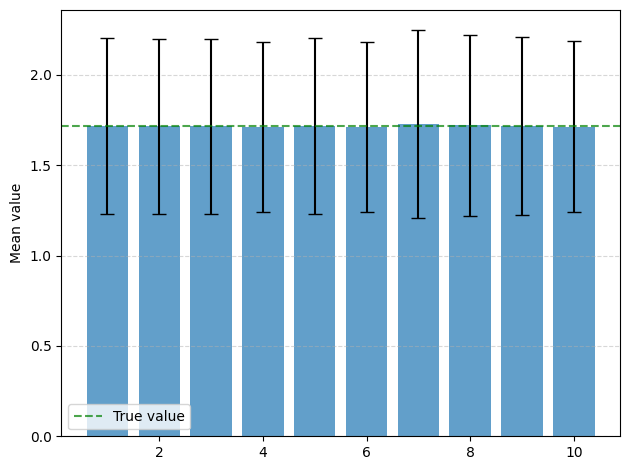

Point estimator for the integral: 1.7161
95% confidence interval: (1.7134, 1.7188)


In [10]:
samples = uniform.rvs(size=(10, 50))
samples = np.hstack([samples, 1 - samples])

xs = np.exp(samples)

means = np.mean(xs, axis=1)
vars = np.var(xs, axis=1, ddof=1)

plot_bar_with_error(means, vars)

estimator = np.mean(means)
stderr = np.std(means, ddof=1) / np.sqrt(len(means))
margin = 1.96 * stderr

print(f"Point estimator for the integral: {estimator:.4f}")
print(f"95% confidence interval: ({estimator - margin:.4f}, {estimator + margin:.4f})")

No matter the 100 Uniform values generated in $u$, this estimate is always closer to the true value, which is $1-e\approx1.718$. The confidence interval is also narrower than with the crude method, showing the antithetic method is more confident.

### 3. Estimate the integral $\int ^1 _0 e^x dx$ using a control variable, with comparable computer ressources.

Estimating the integral using a control variate, we use $U\sim\text{Uniform}(0,1)$ as the control variate. We apply the corrected estimator:
$$
\hat{\theta}_{cv} = \bar{X}+c(Y-\text{E}[Y])
$$
where $c$ is chosen as to minimize the variance. As the slides say, we set $c=-0.14086 \cdot 12$:


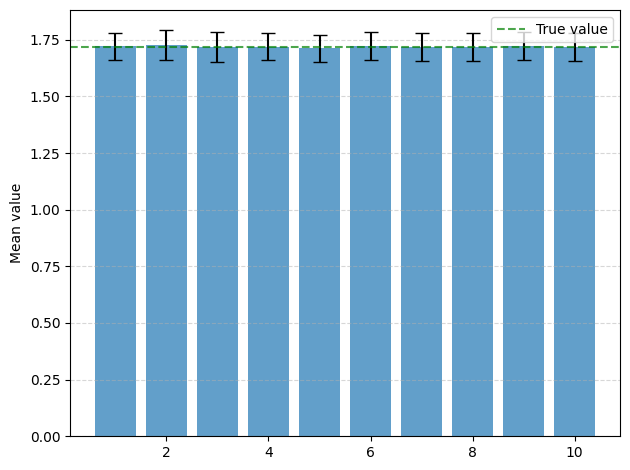

Point estimator for the integral: 1.7191
95% confidence interval: (1.7167, 1.7214)


In [11]:
us = uniform.rvs(size=(10, 100))

xs = np.exp(us)

c = -0.14086 * 12 # optimal value from slides

zs = xs + c * (us - 0.5)

means = np.mean(zs, axis=1)
vars = np.var(zs, axis=1)

plot_bar_with_error(means, vars)

estimator = np.mean(means)
stderr = np.std(means, ddof=1) / np.sqrt(len(means))
margin = 1.96 * stderr

print(f"Point estimator for the integral: {estimator:.4f}")
print(f"95% confidence interval: ({estimator - margin:.4f}, {estimator + margin:.4f})")

Again, this is close to the true value of $1-e\approx1.718$, with a narrow confidence interval.

### 4. Estimate the integral $\int ^1 _0 e^x dx$ using stratified sampling, with comparable computer ressources

Using the stratified sampling method, we split the interval [0,1] into 100 equal-width subintervals. Here, in each subinterval $[\frac{i-1}{100}, \frac{i}{100}]$, one sample is drawn, ensuring even coverage, and reducing variance.

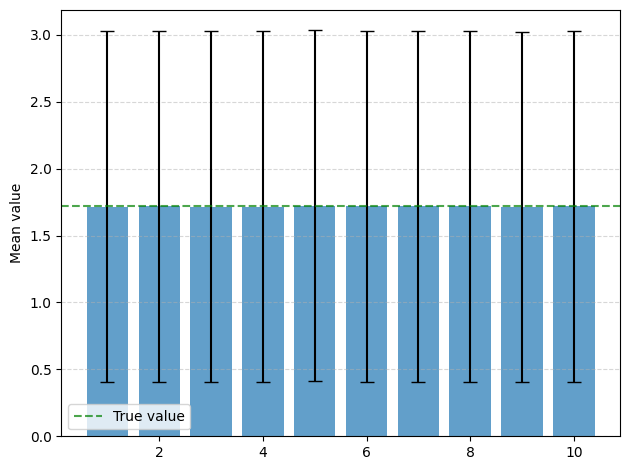

Point estimator for the integral: 1.7179
95% confidence interval: (1.7166, 1.7193)


In [24]:
us = uniform.rvs(size=(10, 10, 10))

us_stratified = (np.arange(10).reshape(1, -1, 1) + us) / 10

ws = np.mean(np.exp(us_stratified), axis=1)

means = np.mean(ws, axis=1)
vars = np.mean(ws, axis=1)

plot_bar_with_error(means, vars)

estimator = np.mean(means)
stderr = np.std(means, ddof=1) / np.sqrt(len(means))
margin = 1.96 * stderr

print(f"Point estimator for the integral: {estimator:.4f}")
print(f"95% confidence interval: ({estimator - margin:.4f}, {estimator + margin:.4f})")

The estimate is close to the true value of $1-e\approx1.718$.

### 5. Use control variates to reduce the variance of the estimator in exercise 4 (Poisson arrivals).

To further reduce the variance by using the control variates, we combine stratified sampling and control variate methods. Specifically, we seek the the corrected estimator $\hat{\theta}_{cv}$:
$$
\hat{\theta}_{cv} = \bar{X}+c(Y-\text{E}[Y])
$$
while using stratified values:

In [27]:
u = (np.random.uniform(0, 1, 100) + np.arange(100)) / 100  
x = np.exp(u)
y = u 

cov_xy = np.cov(x, y, ddof=1)[0, 1]
var_y = np.var(y, ddof=1)
c = -cov_xy / var_y

adjusted = x + c * (y - 0.5)
estimator = np.mean(adjusted)

std_dev = np.std(adjusted, ddof=1)
se = std_dev / np.sqrt(100)
z = stats.norm.ppf(0.975)
lower = estimator - z * se
upper = estimator + z * se

print(f"Point estimator for the integral: {estimator:.4f}")
print(f"95% confidence interval: ({lower:.4f}, {upper:.4f})")

Point estimator for the integral: 1.7182
95% confidence interval: (1.7059, 1.7305)


This method has obtains an accurate approximation of $1-e$, but it has a wide confidence interval

### 6. Demonstrate the effect of using common random numbers in exercise 4 for the difference between Poisson arrivals (Part 1) and a renewal process with hyperexponential interarrival times. Remark: You might need to do some thinking and some re-programming.

Now, we will return to exercise 4.1 and take some of the code as for inspiration.

We have set up the same system, but we compare the blocking abilities two systems: one with Poisson arrivals and one with hyperexponential interarrival times. Now, we will reimplement them but with Common Random Numbers (CRNs), hopefully reducing the variance of the difference between the systems:

In [28]:
import numpy as np
import heapq
from scipy.stats import expon, uniform
from enum import StrEnum

np.random.seed(1234)

class Event(StrEnum):
    ARRIVED = "Arrived"
    SERVICED = "Serviced"
    BLOCKED = "Blocked"

def generate_hyperexp_samples(u, p=0.5, lambda1=2.0, lambda2=0.5):
    selector = u < p
    samples = np.empty_like(u)
    samples[selector] = expon(scale=1/lambda1).ppf(u[selector] / p)
    samples[~selector] = expon(scale=1/lambda2).ppf((u[~selector] - p) / (1 - p))
    return samples

def simulate_system_from_arrivals(arrival_times, service_time_dist, m=10):
    service_units = [i for i in range(m)]
    events = [(time, Event.ARRIVED) for time in arrival_times]
    heapq.heapify(events)

    n_serviced = 0
    n_blocked = 0

    while events:
        event = heapq.heappop(events)
        match event:
            case (time, Event.ARRIVED):
                if service_units:
                    finish_time = time + service_time_dist.rvs()
                    heapq.heappush(events, (finish_time, Event.SERVICED, service_units.pop()))
                else:
                    heapq.heappush(events, (time, Event.BLOCKED))
            case (_, Event.SERVICED, unit):
                service_units.append(unit)
                n_serviced += 1
            case (_, Event.BLOCKED):
                n_blocked += 1

    return n_serviced, n_blocked

n_customers = 10000
m = 10
service_time_dist = expon(scale=8)

uniforms = uniform.rvs(size=n_customers)

poisson_interarrivals = expon(scale=1).ppf(uniforms)
hyperexp_interarrivals = generate_hyperexp_samples(uniforms, p=0.5, lambda1=2.0, lambda2=0.5)

poisson_arrivals = np.cumsum(poisson_interarrivals)
hyperexp_arrivals = np.cumsum(hyperexp_interarrivals)

n_served_pois, n_blocked_pois = simulate_system_from_arrivals(poisson_arrivals, service_time_dist, m)
n_served_hyper, n_blocked_hyper = simulate_system_from_arrivals(hyperexp_arrivals, service_time_dist, m)

block_rate_pois = n_blocked_pois / n_customers
block_rate_hyper = n_blocked_hyper / n_customers
diff = abs(block_rate_pois - block_rate_hyper)

print(f"Blocking probability (Poisson):          {block_rate_pois:.4f}")
print(f"Blocking probability (Hyperexponential): {block_rate_hyper:.4f}")
print(f"Difference using common random numbers:  {diff:.4f}")


Blocking probability (Poisson):          0.1275
Blocking probability (Hyperexponential): 0.0984
Difference using common random numbers:  0.0291


The results show that while the hypterexponential distributed system has a somewhat lower blocing probability than the Poisson distributed system, the system performs best with Common Random Numbers. Specifically, the CRNs ensure that the variance of the difference estimator is reduced, making it statistically more stable. 

### 7. For a standard normal random variable Z ∼ N(0, 1) using the crude Monte Carlo estimator estimate the probability Z > a. Then try importance sampling with a normal density with mean a and variance σ2. For the expirements start using σ2 = 1, use different values of a (e.g. 2 and 4), and different sample sizes. If time permits experiment with other values for σ2. Finally discuss the efficiency of the methods.


To estimate $\text{P}(Z>a)$ for $Z\sim \text{N}(0,1)$ using the crude Monte-Carlo and importance sampling methods. For importance sampling, we use a $\text{N}(0,1)$ and apply a likelihood ratio weighting. The experiments are done for the values $a\in\{2,4\}$, $n\in\{1000,10000\}$, and $\sigma^2=1$, to compare the accuracies and variances:

In [29]:
for a in [2, 4]:
    print(f"a = {a}")
    print(f"Analytical solution: {1 - norm.cdf(a):.6f}")
    for n in [10, 100, 1000, 10_000]:
        print(f"N = {n}")
        zs = norm.rvs(size=n)
        
        crude = np.mean(zs > a)

        ys = norm.rvs(size=n, loc=a, scale=1)

        imp_sampl = np.mean((ys > a) * norm.pdf(ys) / norm.pdf(ys, loc=a, scale=1))

        print(f"Crude estimate:      {crude:.6f}")
        print(f"Importance sampling: {imp_sampl:.6f}")

a = 2
Analytical solution: 0.022750
N = 10
Crude estimate:      0.000000
Importance sampling: 0.011296
N = 100
Crude estimate:      0.000000
Importance sampling: 0.023188
N = 1000
Crude estimate:      0.023000
Importance sampling: 0.022988
N = 10000
Crude estimate:      0.020500
Importance sampling: 0.022977
a = 4
Analytical solution: 0.000032
N = 10
Crude estimate:      0.000000
Importance sampling: 0.000029
N = 100
Crude estimate:      0.000000
Importance sampling: 0.000028
N = 1000
Crude estimate:      0.000000
Importance sampling: 0.000031
N = 10000
Crude estimate:      0.000000
Importance sampling: 0.000031


From this, we can conclude the following:

- For $a=2$, both the crude Monte-Carlo and importance sampling produce reasonable estimates, but importance sampling has lower variance, making it more efficient.
- For $a=4$, crude Monte Carlo fails  (probability = 0), while importance sampling still gives a valid, low-variance estimate.

This demonstrates that importance sampling is especially valuable for rare event estimation, wherein crude Monte Carlo becomes unreliable.

### 8. Use importance sampling with g(x) = λ exp (−λ ∗ x) to calculate the integral $\int ^1 _0 e^x dx$ of Question 1. Try to find the optimal value of λ by calculating the variance of h(X)f(X)/g(X) and verify by simulation. Note that importance sampling with the exponential distribution will not reduce the variance.

To estimate the integral of Question 1, we use importance sampling, by sampling from the following exponential distribution:
$$
g(x) = \lambda e ^{\lambda x}, \quad x\in[0,1]
$$

In order to find the optimal value for $\lambda$, we calculate the variance of $\frac{h(X)\cdot f(X)}{g(X)}$ and verify it by simulation. We simulate $n=10000$ runs.


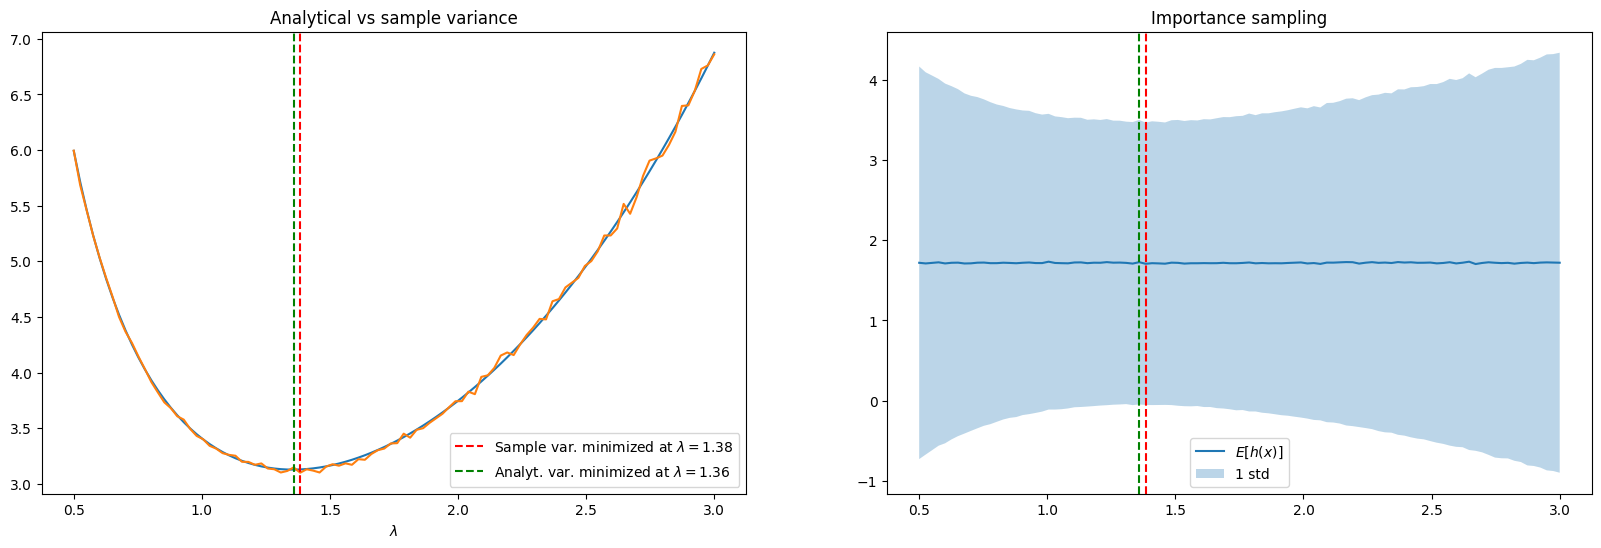

In [30]:
n = 100
vars = np.empty(n)
means = np.empty(n)
lambdas = np.linspace(0.5, 3.0, n)

def analytical_variance(xs):
    squared_variance = (np.exp(1) - 1) ** 2
    variance_of_square = 1/xs * 1/(2 + xs) * (np.exp(2 + xs) - 1)
    return variance_of_square - squared_variance


for i, gamma in enumerate(lambdas):
    g = expon(scale=1/gamma)
    gs = g.rvs(size=100_000)

    # remember to include the uniform pdf, since the exponential
    # has support outside [0, 1)
    samples = np.exp(gs) * uniform.pdf(gs) / g.pdf(gs)

    means[i] = np.mean(samples)
    vars[i] = np.var(samples)

min_idx = np.argmin(vars)

stds = np.sqrt(vars)

analyt_vars = analytical_variance(lambdas)
analyt_min_idx = np.argmin(analyt_vars)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title("Analytical vs sample variance")
ax1.plot(lambdas, analyt_vars)
ax1.plot(lambdas, vars)
ax1.set_xlabel(r"$\lambda$")
ax1.axvline(lambdas[min_idx], linestyle="--", color="r", label=f"Sample var. minimized at $\\lambda = {lambdas[min_idx]:.2f}$")
ax1.axvline(lambdas[analyt_min_idx], linestyle="--", color="g", label=f"Analyt. var. minimized at $\\lambda = {lambdas[analyt_min_idx]:.2f}$")
ax1.legend()

ax2.plot(lambdas, means, label=r"$E[h(x)]$")
ax2.fill_between(lambdas, means - stds, means + stds, alpha=0.3, label='1 std')
ax2.axvline(lambdas[min_idx], linestyle="--", color="r")
ax2.axvline(lambdas[analyt_min_idx], linestyle="--", color="g")
ax2.set_title("Importance sampling")
ax2.legend()
plt.show()